
## <font color=red> You should not import any new libraries. Your code should run with python=3.x</font>

#### <font color=red>For lab assignment, you will work with two datasets. The trained weights need to be saved and shared with us in a folder called models with the name ./models/{dataset_name}_weights.pkl. Your predict function should load these weights, initialize the DNN and predict the labels.</font>

- Your solutions will be auto-graded. Hence we request you to follow the instructions.
- Modify the code only between 
```
## TODO
## END TODO
```
- In addition to above changes, you can play with arguments to the functions for generating plots
- We will run the auto grading scripts with private test data

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
import pickle as pkl

Preprocessing

In [2]:
def preprocessing(X):
  """
  Implement Normalization for input image features

  Args:
  X : numpy array of shape (n_samples, 784)
   
  Returns:
  X_out: numpy array of shape (n_samples, 784) after normalization
  """
  X_out = None
  
  ## TODO
    
  mu = np.mean(X, axis=0)
  sigma = np.std(axis=0)
  X_out = (X-mu)/sigma
  
  ## END TODO

  assert X_out.shape == X.shape

  return X_out

### Split data into train/val

In [3]:
def split_data(X, Y, train_ratio=0.8):
    '''
    Split data into train and validation sets
    The first floor(train_ratio*n_sample) samples form the train set
    and the remaining the test set

    Args:
    X - numpy array of shape (n_samples, n_features)
    Y - numpy array of shape (n_samples, 1)
    train_ratio - fraction of samples to be used as training data

    Returns:
    X_train, Y_train, X_val, Y_val
    '''
    # Try Normalization and scaling and store it in X_transformed
    X_transformed = X

    ## TODO
    
    M = np.max(X, axis=1).reshape(-1,1)
    m = np.min(X, axis=1).reshape(-1,1)
    X_transformed = (X-m)/(M-m)
    
    ## END TODO

    assert X_transformed.shape == X.shape

    num_samples = len(X)
    indices = np.arange(num_samples)
    num_train_samples = math.floor(num_samples * train_ratio)
    train_indices = np.random.choice(indices, num_train_samples, replace=False)
    val_indices = list(set(indices) - set(train_indices))
    X_train, Y_train, X_val, Y_val = X_transformed[train_indices], Y[train_indices], X_transformed[val_indices], Y[val_indices]
  
    return X_train, Y_train, X_val, Y_val

#Flatten the input

In [4]:
class FlattenLayer:
    '''
    This class converts a multi-dimensional into 1-d vector
    '''
    def __init__(self, input_shape):
        '''
         Args:
          input_shape : Original shape, tuple of ints
        '''
        self.input_shape = input_shape

    def forward(self, input):
        '''
        Converts a multi-dimensional into 1-d vector
        Args:
          input : training data, numpy array of shape (n_samples , self.input_shape)

        Returns:
          input: training data, numpy array of shape (n_samples , -1)
        '''
        ## TODO
        n_samp = input.shape[0]
        inp = input.reshape(n_samp, -1)
        #Modify the return statement to return flattened input
        return inp
        ## END TODO
        
    
    def backward(self, output_error, learning_rate):
        '''
        Converts back the passed array to original dimention 
        Args:
        output_error :  numpy array 
        learning_rate: float

        Returns:
        output_error: A reshaped numpy array to allow backward pass
        '''
        ## TODO
        nsamps = output_error.shape[0]
        out_sh = [nsamps]+ list(self.input_shape)
        output_err = output_error.reshape(out_sh)
        #Modify the return statement to return reshaped array
        return output_error
        ## END TODO
        

#Fully Connected Layer

In [5]:
class FCLayer:
    '''
    Implements a fully connected layer  
    '''
    def __init__(self, input_size, output_size):
        '''
        Args:
         input_size : Input shape, int
         output_size: Output shape, int 
        '''
        self.input_size = input_size
        self.output_size = output_size
        ## TODO
        self.weights = np.random.randn(self.input_size, self.output_size)*(1/self.input_size) #initilaise weights for this layer
        self.bias = np.random.randn(self.output_size) #initilaise bias for this layer
        ## END TODO

    def forward(self, input):
        '''
        Performs a forward pass of a fully connected network
        Args:
          input : training data, numpy array of shape (n_samples , self.input_size)

        Returns:
           numpy array of shape (n_samples , self.output_size)
        '''
        ## TODO
        self.Z0 = np.copy(input)
        Z1 = np.dot(input, self.weights) + self.bias
        #Modify the return statement to return numpy array of shape (n_samples , self.output_size)
        return Z1
        ## END TODO
        

    def backward(self, output_error, learning_rate):
        '''
        Performs a backward pass of a fully connected network along with updating the parameter 
        Args:
          output_error :  numpy array 
          learning_rate: float

        Returns:
          Numpy array resulting from the backward pass
        '''
        ## TODO
        
        nsamps = output_error.shape[0]
        dW = (1/nsamps)*np.matmul(self.Z0.T, output_error)
        db = np.mean(output_error, axis=0)
        dA = np.matmul(output_error, self.weights.T)
        
        self.weights -= learning_rate*dW
        self.bias -= learning_rate*db

        #Modify the return statement to return numpy array resulting from backward pass
        return dA
        ## END TODO

In [6]:
class ActivationLayer:
    '''
    Implements a Activation layer which applies activation function on the inputs. 
    '''
    def __init__(self, activation, activation_prime):
        '''
          Args:
          activation : Name of the activation function (sigmoid,tanh or relu)
          activation_prime: Name of the corresponding function to be used during backpropagation (sigmoid_prime,tanh_prime or relu_prime)
        '''
        self.activation = activation
        self.activation_prime = activation_prime
    
    def forward(self, input):
        '''
        Applies the activation function 
        Args:
          input : numpy array on which activation function is to be applied

        Returns:
           numpy array output from the activation function
        '''
        ## TODO
        self.Z = self.activation(input)
        #Modify the return statement to return numpy array of shape (n_samples , self.output_size)
        return self.Z
        ## END TODO
        

    def backward(self, output_error, learning_rate):
        '''
        Performs a backward pass of a fully connected network along with updating the parameter 
        Args:
          output_error :  numpy array 
          learning_rate: float

        Returns:
          Numpy array resulting from the backward pass
        '''
        ## TODO
        out = (learning_rate * output_error) * self.activation_prime(self.Z)
        #Modify the return statement to return numpy array resulting from backward pass
        return out
        ## END TODO

In [7]:

class SoftmaxLayer:
    '''
      Implements a Softmax layer which applies softmax function on the inputs. 
    '''
    def __init__(self, input_size):
        self.input_size = input_size
    
    def forward(self, input):
        '''
        Applies the softmax function 
        Args:
          input : numpy array on which softmax function is to be applied

        Returns:
           numpy array output from the softmax function
        '''
        ## TODO
        e1 = np.exp(input)
        esum = np.sum(e1, axis =1).reshape(-1,1)
        self.out = e1/esum
        #Modify the return statement to return numpy array of shape (n_samples , self.output_size)
        return self.out
        ## END TODO
        
    def backward(self, output_error, learning_rate):
        '''
        Performs a backward pass of a Softmax layer
        Args:
          output_error :  numpy array 
          learning_rate: float

        Returns:
          Numpy array resulting from the backward pass
        '''
        ## TODO
        do = self.out * (output_error -(output_error * self.out).sum(axis=1)[:,None])
        #Modify the return statement to return numpy array resulting from backward pass
        return do
        ## END TODO

In [8]:
def sigmoid(x):
    '''
    Sigmoid function 
    Args:
        x :  numpy array 
    Returns:
        Numpy array after applying simoid function
    '''
    ## TODO
    z = 1./(1. + np.exp(-x))
    #Modify the return statement to return numpy array resulting from backward pass
    return z
    ## END TODO

def sigmoid_prime(x):
    '''
     Implements derivative of Sigmoid function, for the backward pass
    Args:
        x :  numpy array 
    Returns:
        Numpy array after applying derivative of Sigmoid function
    '''
    ## TODO
    dz = x*(1. -x)
    #Modify the return statement to return numpy array resulting from backward pass
    return dz
    ## END TODO

def tanh(x):
    '''
    Tanh function 
    Args:
        x :  numpy array 
    Returns:
        Numpy array after applying tanh function
    '''
    ## TODO
    z = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
    #Modify the return statement to return numpy array resulting from backward pass
    return z
    ## END TODO

def tanh_prime(x):
    '''
     Implements derivative of Tanh function, for the backward pass
    Args:
        x :  numpy array 
    Returns:
        Numpy array after applying derivative of Tanh function
    '''
    ## TODO
    dz = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
    #Modify the return statement to return numpy array resulting from backward pass
    return dz
    ## END TODO

def relu(x):
    '''
    ReLU function 
    Args:
        x :  numpy array 
    Returns:
        Numpy array after applying ReLU function
    '''
    ## TODO
    z = x * (x > 0)
    #Modify the return statement to return numpy array resulting from backward pass
    return z
    ## END TODO

def relu_prime(x):
    '''
     Implements derivative of ReLU function, for the backward pass
    Args:
        x :  numpy array 
    Returns:
        Numpy array after applying derivative of ReLU function
    '''
    ## TODO
    dz = 1. * (x > 0)
    #Modify the return statement to return numpy array resulting from backward pass
    return dz
    ## END TODO

In [9]:
def mse(y_true, y_pred):
    '''
    MSE loss
    Args:
        y_true :  Ground truth labels, numpy array 
        y_true :  Predicted labels, numpy array 
    Returns:
       loss : float
    '''
    ## TODO
    loss = np.mean(np.square(y_pred - y_true), axis=1)
    #Modify the return statement to return numpy array resulting from backward pass
    return loss
    ## END TODO

def mse_prime(y_true, y_pred):
    '''
    Implements derivative of MSE function, for the backward pass
    Args:
        x :  numpy array 
    Returns:
        Numpy array after applying derivative of MSE function
    '''
    ## TODO
    dl = 2*(1/y_true.shape[1])*(y_pred-y_true)
    #Modify the return statement to return numpy array resulting from backward pass
    return dl
    ## END TODO

def cross_entropy(y_true, y_pred):
    '''
    Cross entropy loss 
    Args:
        y_true :  Ground truth labels, numpy array 
        y_true :  Predicted labels, numpy array 
    Returns:
       loss : float
    '''
    ## TODO
    loss = (np.where(y_true==1, -np.log(np.clip(y_pred, 1e-8, None)), 0)).sum(axis=1)
    #Modify the return statement to return numpy array resulting from backward pass
    return loss
    ## END TODO

def cross_entropy_prime(y_true, y_pred):
    '''
    Implements derivative of cross entropy function, for the backward pass
    Args:
        x :  numpy array 
    Returns:
        Numpy array after applying derivative of cross entropy function
    '''
    ## TODO
    dl = np.where(y_true==1, -1/np.clip(y_pred, 1e-8, None), 0)
    #Modify the return statement to return numpy array resulting from backward pass
    return dl
    ## END TODO

Fit function

In [10]:
# def fit(X_train, Y_train,dataset_name):

#     '''
#     Create and trains a feedforward network

#     Do not forget to save the final weights of the feed forward network to a file. Use these weights in the `predict` function 
#     Args:
#         X_train -- np array of share (num_test, 2048) for flowers and (num_test, 28, 28) for mnist.
#         Y_train -- np array of share (num_test, 2048) for flowers and (num_test, 28, 28) for mnist.
#         dataset_name -- name of the dataset (flowers or mnist)
    
#     '''
     
#     #Note that this just a template to help you create your own feed forward network 
#     ## TODO

#     #define your network
#     #This network would work only for mnist
#     network = [
#         FlattenLayer(input_shape=(28, 28)),
#         FCLayer(28 * 28, 12),
#         ActivationLayer(sigmoid, sigmoid_prime),
#         FCLayer(12, 10),
#         SoftmaxLayer(10)
#     ] # This creates feed forward 


#     # Choose appropriate learning rate and no. of epoch
#     epochs = 40
#     learning_rate = 0.1

#     # Change training loop as you see fit
#     for epoch in range(epochs):
#         error = 0
#         for x, y_true in zip(x_train, y_train):
#             # forward
#             output = x
#             for layer in network:
#                 output = layer.forward(output)
            
#             # error (display purpose only)
#             error += mse(y_true, output)

#             # backward
#             output_error = mse_prime(y_true, output)
#             for layer in reversed(network):
#                 output_error = layer.backward(output_error, learning_rate)
        
#         error /= len(x_train)
#         print('%d/%d, error=%f' % (epoch + 1, epochs, error))

#     #Save you model weights
    
#     ## END TODO


In [11]:
def fit(X_train, Y_train,dataset_name):

    '''
    Create and trains a feedforward network

    Do not forget to save the final weights of the feed forward network to a file. Use these weights in the `predict` function 
    Args:
        X_train -- np array of share (num_test, 2048) for flowers and (num_test, 28, 28) for mnist.
        Y_train -- np array of share (num_test, 2048) for flowers and (num_test, 28, 28) for mnist.
        dataset_name -- name of the dataset (flowers or mnist)
    
    '''
     
    #Note that this just a template to help you create your own feed forward network 
    ## TODO
    
    # Choose appropriate learning rate and no. of epoch
    index = ['mnist', 'flowers'].index(dataset_name)

    input_shape = X_train.shape[1:]
    epochs = [500, 500][index]
    learning_rate = 0.02
    batch_size = [16, 8][index]
    n_labels = [10, 5][index]
    
    # nonrmalize and store in X_norm
    mu, sigma = np.mean(X_train, axis=0), np.std(X_train, axis=0)
    norm_pms = [mu, sigma]
    sigma[sigma == 0] = 1
    X_norm = (X_train - mu)/(sigma)
    
    # scale X_norm and store in X_scaled
    diff = (np.max(X_norm, axis=0) - np.min(X_norm, axis=0))
    diff[diff == 0] = 1
    X_scaled = (X_norm - np.min(X_norm, axis=0)) / (diff)
    
    # update X_train 
    X_train = X_scaled   
    
    #define your network
    #This network would work only for mnist
    network = [
        FlattenLayer(input_shape=input_shape),
        FCLayer(np.prod(input_shape), 48),
        ActivationLayer(relu, relu_prime),
        FCLayer(48, n_labels),
        SoftmaxLayer(n_labels)
    ] # This creates feed forward 


    # Change training loop as you see fit
    ls = []
    for epoch in range(epochs):
        error = 0
        for i in range(0, X_train.shape[0], batch_size):

            output = X_train[i:i + batch_size]
            for layer in network:
                output = layer.forward(output)

            y_true = Y_train[i:i + batch_size]

            y_vec = np.zeros((batch_size, n_labels))
            for j in range(batch_size):
                y_vec[j, y_true[j]] = 1

            error += cross_entropy(y_vec, output).sum()
#             print(y_vec.shape, output.shape)

            output_error = cross_entropy_prime(y_vec, output)
            for layer in reversed(network):
                output_error = layer.backward(output_error, learning_rate)

        error /= len(X_train)
        ls.append(error)
        print('%d/%d, error=%f' % (epoch + 1, epochs, error))

    # Save you model weights
    pkl.dump([norm_pms, network], open(f"./models/{dataset_name}_weights.pkl", "wb"))
    return ls
    
    ## END TODO


Loading datasets

train_x -- (60000, 28, 28); train_y -- (60000,)
1/500, error=2.290645
2/500, error=2.082627
3/500, error=1.390489
4/500, error=0.883258
5/500, error=0.658565
6/500, error=0.547618
7/500, error=0.485198
8/500, error=0.445777
9/500, error=0.418768
10/500, error=0.399133
11/500, error=0.384180
12/500, error=0.372310
13/500, error=0.362580
14/500, error=0.354391
15/500, error=0.347353
16/500, error=0.341171
17/500, error=0.335665
18/500, error=0.330698
19/500, error=0.326179
20/500, error=0.322032
21/500, error=0.318194
22/500, error=0.314616
23/500, error=0.311266
24/500, error=0.308110
25/500, error=0.305142
26/500, error=0.302342
27/500, error=0.299697
28/500, error=0.297174
29/500, error=0.294756
30/500, error=0.292423
31/500, error=0.290170
32/500, error=0.287987
33/500, error=0.285868
34/500, error=0.283824
35/500, error=0.281841
36/500, error=0.279906
37/500, error=0.278037
38/500, error=0.276213
39/500, error=0.274430
40/500, error=0.272696
41/500, error=0.270998
42/500, error=0.26

345/500, error=0.090559
346/500, error=0.090400
347/500, error=0.090243
348/500, error=0.090087
349/500, error=0.089927
350/500, error=0.089773
351/500, error=0.089616
352/500, error=0.089459
353/500, error=0.089306
354/500, error=0.089149
355/500, error=0.088997
356/500, error=0.088845
357/500, error=0.088692
358/500, error=0.088541
359/500, error=0.088390
360/500, error=0.088240
361/500, error=0.088092
362/500, error=0.087943
363/500, error=0.087793
364/500, error=0.087644
365/500, error=0.087498
366/500, error=0.087350
367/500, error=0.087204
368/500, error=0.087057
369/500, error=0.086912
370/500, error=0.086766
371/500, error=0.086625
372/500, error=0.086486
373/500, error=0.086341
374/500, error=0.086199
375/500, error=0.086058
376/500, error=0.085916
377/500, error=0.085777
378/500, error=0.085634
379/500, error=0.085494
380/500, error=0.085355
381/500, error=0.085212
382/500, error=0.085075
383/500, error=0.084939
384/500, error=0.084797
385/500, error=0.084662
386/500, error=0

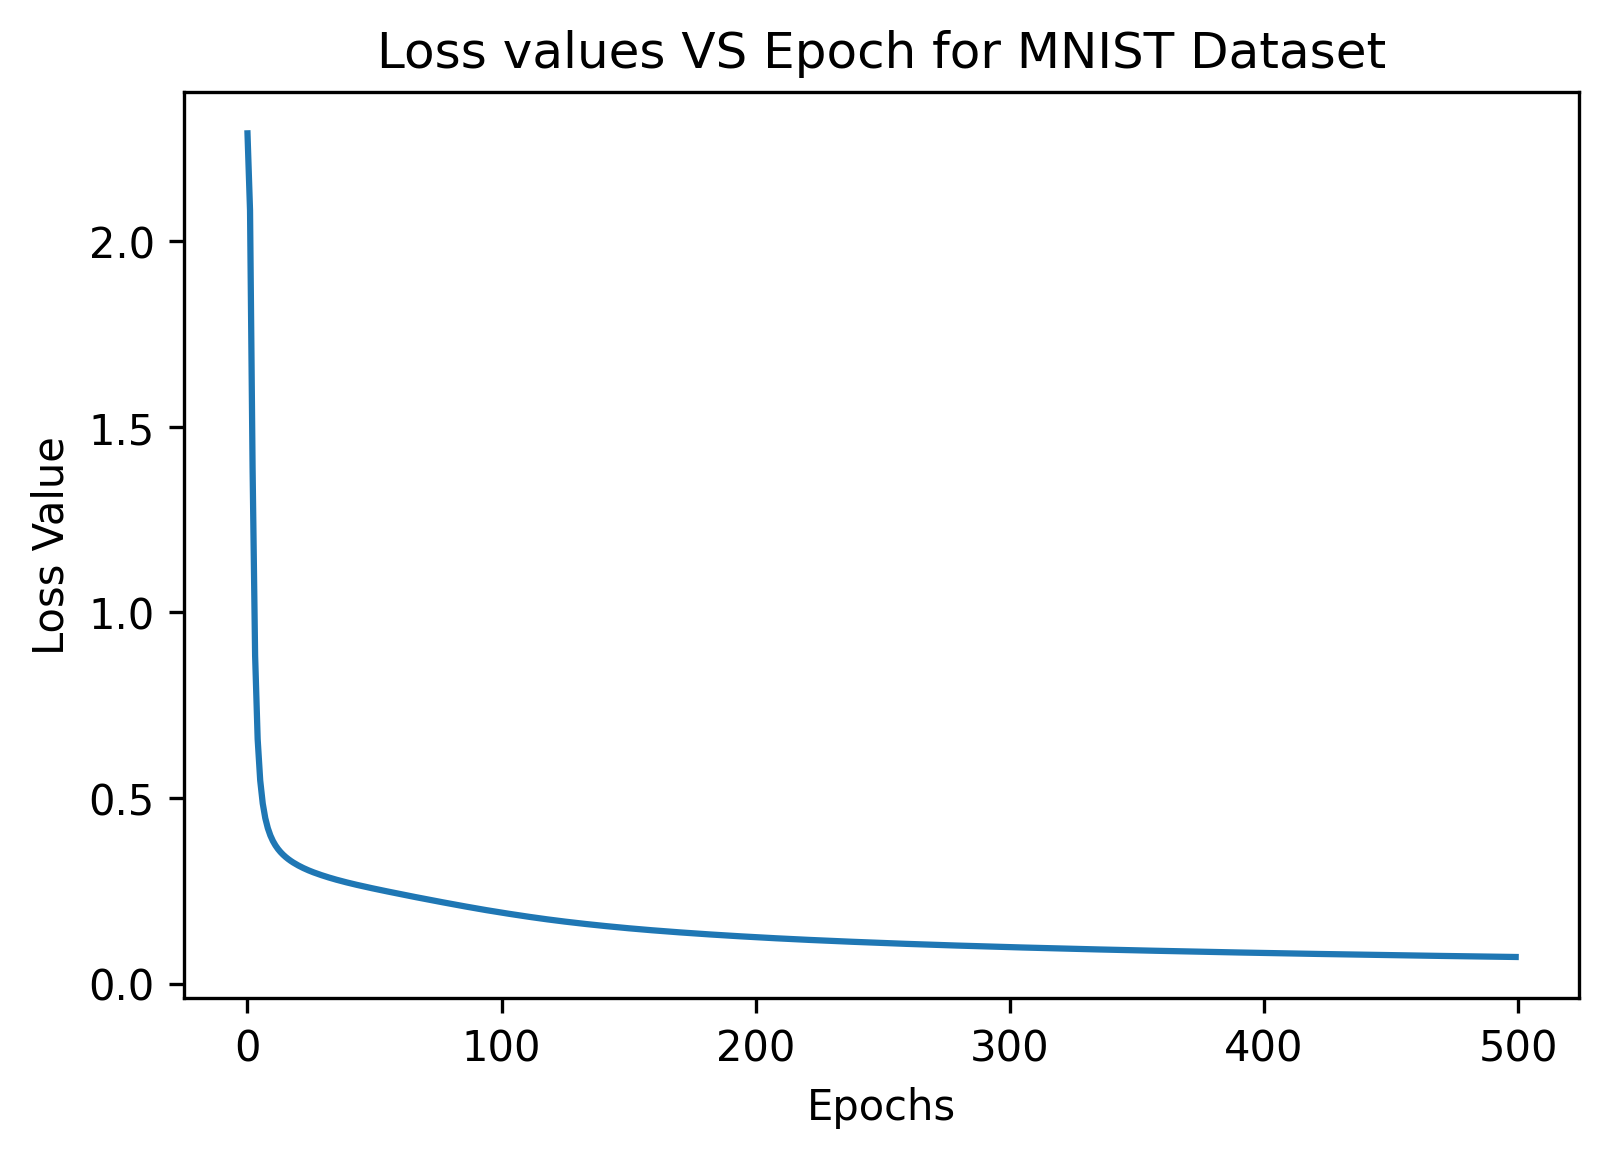

In [12]:
dataset = "mnist" 
with open(f"./data/{dataset}_train.pkl", "rb") as file:
    train_mnist = pkl.load(file)
    print(f"train_x -- {train_mnist[0].shape}; train_y -- {train_mnist[1].shape}")

ls = fit(train_mnist[0],train_mnist[1],'mnist')

plt.figure(dpi=300)
plt.plot(ls)
plt.ylabel("Loss Value")
plt.xlabel("Epochs")
plt.title("Loss values VS Epoch for MNIST Dataset")
plt.show()

train_x -- (2936, 2048); train_y -- (2936,)
1/500, error=1.621599
2/500, error=1.607513
3/500, error=1.605929
4/500, error=1.604232
5/500, error=1.602355
6/500, error=1.600204
7/500, error=1.597652
8/500, error=1.594519
9/500, error=1.590551
10/500, error=1.585394
11/500, error=1.578556
12/500, error=1.569372
13/500, error=1.556979
14/500, error=1.540337
15/500, error=1.518328
16/500, error=1.490056
17/500, error=1.455324
18/500, error=1.414867
19/500, error=1.370459
20/500, error=1.324537
21/500, error=1.279376
22/500, error=1.236553
23/500, error=1.196931
24/500, error=1.160884
25/500, error=1.128455
26/500, error=1.099479
27/500, error=1.073656
28/500, error=1.050610
29/500, error=1.029945
30/500, error=1.011273
31/500, error=0.994238
32/500, error=0.978522
33/500, error=0.963859
34/500, error=0.950025
35/500, error=0.936822
36/500, error=0.924092
37/500, error=0.911707
38/500, error=0.899572
39/500, error=0.887612
40/500, error=0.875769
41/500, error=0.864002
42/500, error=0.852294

346/500, error=0.129451
347/500, error=0.128969
348/500, error=0.128489
349/500, error=0.128011
350/500, error=0.127537
351/500, error=0.127064
352/500, error=0.126594
353/500, error=0.126127
354/500, error=0.125660
355/500, error=0.125198
356/500, error=0.124738
357/500, error=0.124279
358/500, error=0.123825
359/500, error=0.123370
360/500, error=0.122919
361/500, error=0.122472
362/500, error=0.122024
363/500, error=0.121582
364/500, error=0.121138
365/500, error=0.120699
366/500, error=0.120263
367/500, error=0.119827
368/500, error=0.119396
369/500, error=0.118964
370/500, error=0.118537
371/500, error=0.118110
372/500, error=0.117686
373/500, error=0.117266
374/500, error=0.116845
375/500, error=0.116429
376/500, error=0.116012
377/500, error=0.115601
378/500, error=0.115188
379/500, error=0.114781
380/500, error=0.114372
381/500, error=0.113968
382/500, error=0.113567
383/500, error=0.113165
384/500, error=0.112767
385/500, error=0.112370
386/500, error=0.111977
387/500, error=0

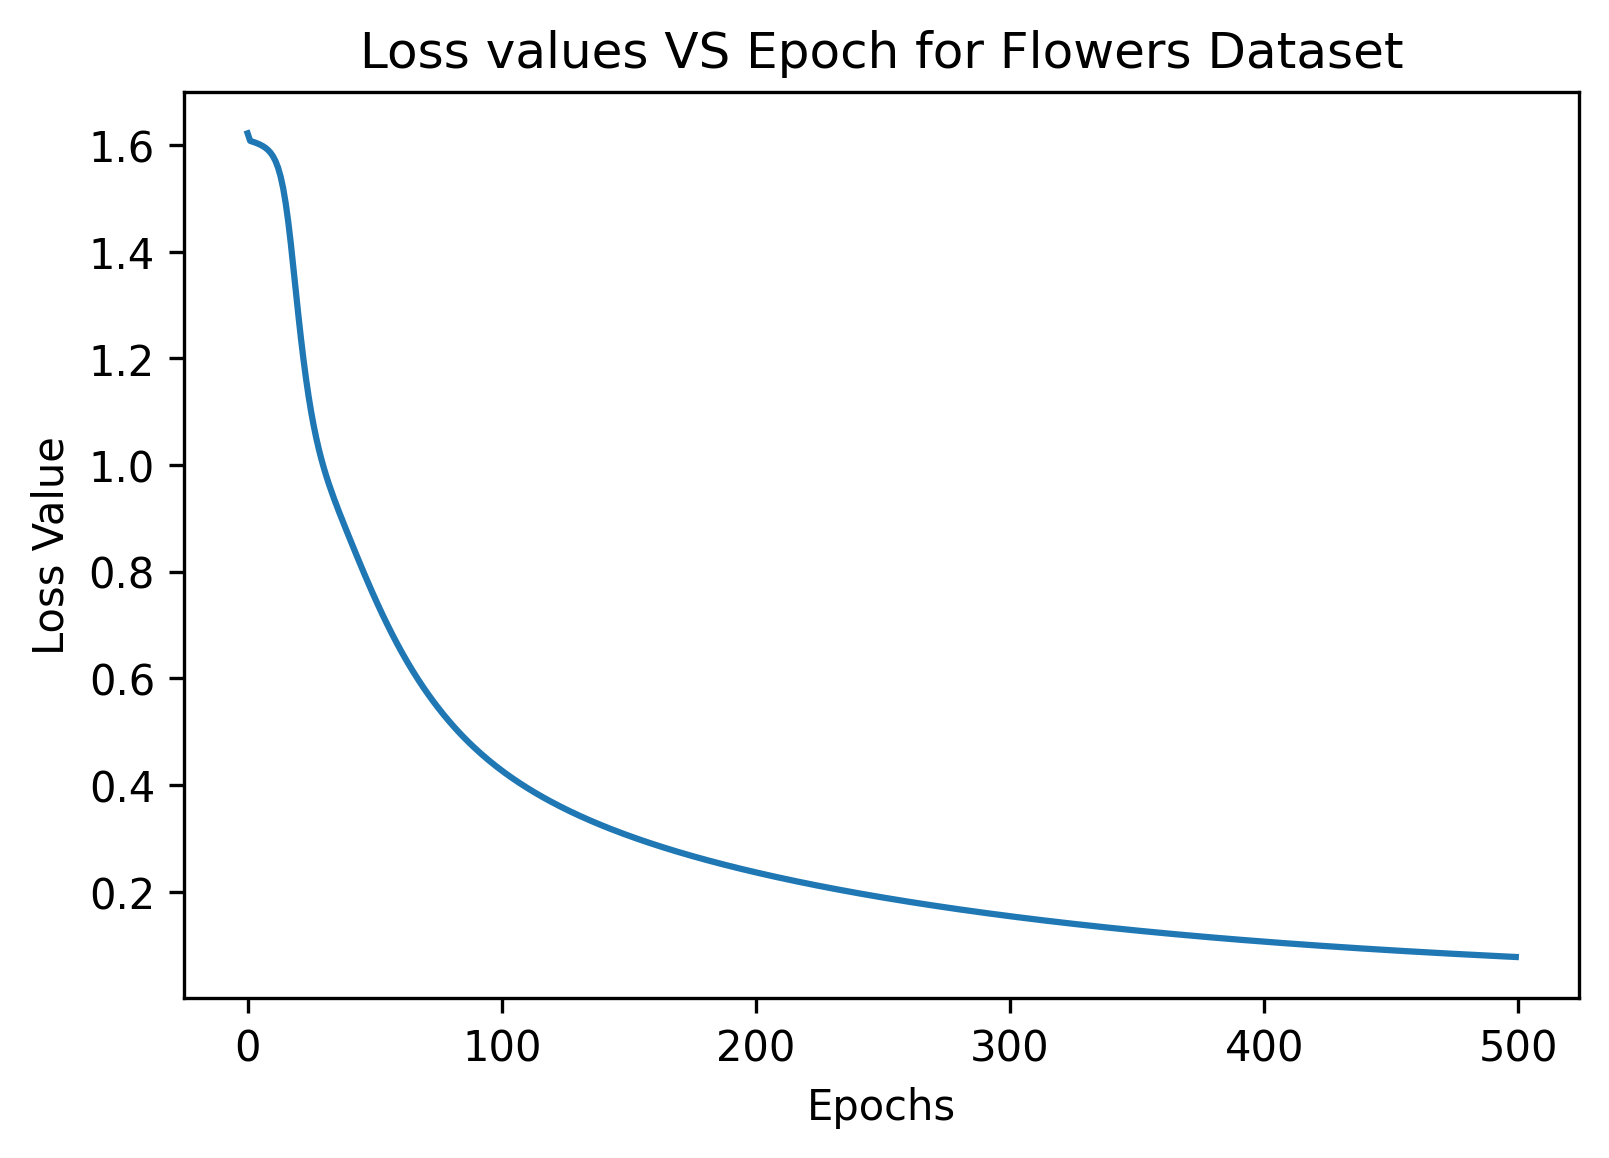

In [13]:
dataset = "flowers" # "mnist"/"flowers"
with open(f"./data/{dataset}_train.pkl", "rb") as file:
    train_flowers = pkl.load(file)
    print(f"train_x -- {train_flowers[0].shape}; train_y -- {train_flowers[1].shape}")

ls = fit(train_flowers[0],train_flowers[1],'flowers')

plt.figure(dpi=300)
plt.plot(ls)
plt.ylabel("Loss Value")
plt.xlabel("Epochs")
plt.title("Loss values VS Epoch for Flowers Dataset")
plt.show()

In [20]:
def predict(X_test, dataset_name):
  """

  X_test -- np array of share (num_test, 2048) for flowers and (num_test, 28, 28) for mnist.

   

  This is the only function that we will call from the auto grader. 

  This function should only perform inference, please donot train your models here.
  
  Steps to be done here:
  1. Load your trained weights from ./models/{dataset_name}_weights.pkl
  2. Ensure that you read weights using only the libraries we have given above.
  3. Initialize your model with your trained weights
  4. Compute the predicted labels and return it

  Please provide us the complete code you used for training including any techniques
  like data augmentation etc. that you have tried out. 

  Return:
  Y_test - nparray of shape (num_test,)
  """
  Y_test = np.zeros(X_test.shape[0],)

  ## TODO
    
  norm_pms, network = pkl.load(open(f'./models/{dataset_name}_weights.pkl', 'rb'))
    
  # nonrmalize and store in X_norm
  mu, sigma = norm_pms
  sigma[sigma == 0] = 1
  X_norm = (X_test - mu)/(sigma)
    
  # scale X_norm and store in X_scaled
  diff = (np.max(X_norm, axis=0) - np.min(X_norm, axis=0))
  diff[diff == 0] = 1
  X_scaled = (X_norm - np.min(X_norm, axis=0)) / (diff)
    
  # update X_train 
  output = X_scaled
    
  for layer in network:
    output = layer.forward(output)
    
  Y_test = np.argmax(output, axis=1)
  ## END TODO
  assert Y_test.shape == (X_test.shape[0],) and type(Y_test) == type(X_test), "Check what you return"
  return Y_test


In [21]:
dataset = "mnist" 
with open(f"./data/{dataset}_train.pkl", "rb") as file:
    train_mnist = pkl.load(file)
    print(f"train_x -- {train_mnist[0].shape}; train_y -- {train_mnist[1].shape}")
    X_test = train_mnist[0]
    Y_test = train_mnist[1]
    
Y_pred = predict(X_test, dataset)
acc = np.sum(Y_pred == Y_test)/Y_test.shape[0]
print("Accuracy: ", np.sum(Y_pred == Y_test)/Y_test.shape[0])

from sklearn.metrics import precision_recall_fscore_support

p, r, f, _ =precision_recall_fscore_support(Y_test, Y_pred, average='macro')
report={'Precision':p, 'Recall':r, 'F1-score':f, "Accuracy":acc}

print("\n\nMNIST Dataset - Training Results\n")
for i in report:
    print("{}: {}".format(i, report[i]))
    
print("\n\n\n")


train_x -- (60000, 28, 28); train_y -- (60000,)
Accuracy:  0.9799333333333333


MNIST Dataset - Training Results

Precision: 0.979759281644743
Recall: 0.9797957828358836
F1-score: 0.9797715005526317
Accuracy: 0.9799333333333333






In [22]:
dataset = "flowers" 
with open(f"./data/{dataset}_train.pkl", "rb") as file:
    train_mnist = pkl.load(file)
    print(f"train_x -- {train_mnist[0].shape}; train_y -- {train_mnist[1].shape}")
    X_test = train_mnist[0]
    Y_test = train_mnist[1]
    
Y_pred = predict(X_test, dataset)
print("Accuracy: ", np.sum(Y_pred == Y_test)/Y_test.shape[0])

p, r, f, _ =precision_recall_fscore_support(Y_test, Y_pred, average='macro')
report={'Precision':p, 'Recall':r, 'F1-score':f, "Accuracy":acc}

print("\n\nFlowers Dataset - Training Results\n")
for i in report:
    print("{}: {}".format(i, report[i]))
    
print("\n\n\n")

train_x -- (2936, 2048); train_y -- (2936,)
Accuracy:  0.9904632152588556


Flowers Dataset - Training Results

Precision: 0.9906494735567464
Recall: 0.9903011633291362
F1-score: 0.9904697849435445
Accuracy: 0.9799333333333333




